# 1. Project Overview

Modern aircraft engines generate large volumes of sensor data during operation. Monitoring this data effectively is critical for ensuring engine reliability, reducing unplanned downtime, and enabling proactive maintenance decisions. Traditional reactive maintenance approaches can lead to increased operational costs and safety risks, making predictive maintenance a key focus area in the aerospace industry.

This project focuses on building an AI-driven predictive maintenance system for aircraft engines using historical sensor data. The objective is to analyze multivariate time-series data collected from aircraft engines and develop machine learning models that can estimate the Remaining Useful Life (RUL) of an engine and detect early signs of abnormal behavior. By identifying degradation patterns before failure occurs, the system aims to support data-driven maintenance planning and risk mitigation.

The project leverages the NASA C-MAPSS turbofan engine dataset, which contains run-to-failure sensor readings across multiple engine life cycles. The workflow includes data preprocessing, feature engineering, model training and evaluation, and result interpretation. In addition to predictive modeling, the project incorporates an explainability layer using GenAI concepts, enabling the generation of human-readable maintenance insights from model outputs.

Overall, this project demonstrates an end-to-end application of machine learning and AI techniques to a real-world aerospace engineering problem, highlighting skills in data analysis, predictive modeling, and AI-assisted decision support.

# 2. Business & Engineering Problem

Aircraft engines operate under complex and varying conditions and are subject to gradual degradation over time. Unplanned engine failures can lead to significant operational disruptions, increased maintenance costs, and potential safety risks. From a business perspective, aerospace organizations must balance engine reliability, maintenance efficiency, and cost control, while ensuring strict compliance with safety and regulatory standards.

Traditional maintenance strategies are often reactive or schedule-based, relying on fixed inspection intervals or component lifetimes. These approaches may result in premature maintenance, unnecessary component replacement, or delayed detection of critical issues. As a result, there is a strong business need for predictive maintenance systems that can accurately assess engine health and forecast failure risk based on actual operating data.

From an engineering standpoint, the challenge lies in analyzing high-dimensional, multivariate time-series sensor data collected across multiple engine life cycles. Each engine exhibits unique operational patterns, degradation rates, and noise characteristics, making it difficult to directly model failure behavior. Engineers must extract meaningful features, identify degradation trends, and distinguish between normal operational variability and true fault conditions.

The core engineering problem addressed in this project is to develop an AI-driven approach that can:

  - Estimate the Remaining Useful Life (RUL) of aircraft engines based on historical sensor readings.

  - Detect early-stage anomalies that may indicate abnormal degradation or impending failure.

  - Provide interpretable insights that support maintenance decision-making rather than producing opaque predictions.

By solving this problem, the system aims to support data-driven maintenance planning, reduce unplanned downtime, and improve overall operational efficiency, aligning both engineering objectives and business outcomes in the aerospace domain.

# 3. Dataset Description

This project uses the NASA C-MAPSS (Commercial Modular Aero-Propulsion System Simulation) turbofan engine dataset, a publicly available benchmark dataset designed for predictive maintenance and remaining useful life (RUL) estimation in aerospace applications. The dataset contains simulated run-to-failure sensor data collected from multiple aircraft engines operating under varying conditions.

Each engine in the dataset is monitored over multiple operational cycles, starting from a healthy state and progressing toward system failure. At each cycle, a set of operational settings and sensor measurements is recorded, capturing the gradual degradation behavior of the engine.

- Dataset Structure

 - The FD001 subset of the C-MAPSS dataset consists of three primary files:

   - train_FD001.txt:
     Contains complete engine life cycles from start-up until failure. This data is used for model training and learning degradation patterns.

   - test_FD001.txt:
     Contains partial engine life cycles where engines have not yet failed. This data is used for model evaluation.

   - RUL_FD001.txt:
     Provides the true Remaining Useful Life values for each engine in the test dataset, enabling quantitative evaluation of model predictions.

- Features and Variables

  - Each record in the dataset includes:

    - Engine ID: Unique identifier for each engine.

    - Cycle: Time step representing an operational cycle.
 
    - Operational Settings (3 variables): Represent external or operational conditions under which the engine is running.

    - Sensor Measurements (21 variables): Continuous measurements capturing engine behavior such as temperature, pressure, and rotational speed.

All sensor values are numeric and sampled at consistent intervals, making the dataset suitable for time-series analysis and machine learning-based modeling.

- Dataset Characteristics

  - Multivariate time-series data

  - High dimensional (25+ features per time step)

  - Engine-specific degradation trajectories

  - No missing values in raw data

Failure events occur only in the training set

# 4. Exploratory Data Analysis(EDA)


In [1]:
import pandas as pd

columns = [
    "engine_id", "cycle",
    "op_setting_1", "op_setting_2", "op_setting_3",
    "sensor_1", "sensor_2", "sensor_3", "sensor_4", "sensor_5",
    "sensor_6", "sensor_7", "sensor_8", "sensor_9", "sensor_10",
    "sensor_11", "sensor_12", "sensor_13", "sensor_14", "sensor_15",
    "sensor_16", "sensor_17", "sensor_18", "sensor_19", "sensor_20",
    "sensor_21"
]



In [2]:
train_df = pd.read_csv(
    "data/train_FD001.txt",
    sep=" ",
    header=None,
    names=columns
)

train_df.head()

engine_id   cycle  op_setting_1  op_setting_2  op_setting_3  sensor_1  \
1 1    -0.0007 -0.0004         100.0        518.67        641.82   1589.70   
  2     0.0019 -0.0003         100.0        518.67        642.15   1591.82   
  3    -0.0043  0.0003         100.0        518.67        642.35   1587.99   
  4     0.0007  0.0000         100.0        518.67        642.35   1582.79   
  5    -0.0019 -0.0002         100.0        518.67        642.37   1582.85   

     sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_12  sensor_13  \
1 1   1400.60     14.62     21.61    554.36  ...    8138.62     8.4195   
  2   1403.14     14.62     21.61    553.75  ...    8131.49     8.4318   
  3   1404.20     14.62     21.61    554.26  ...    8133.23     8.4178   
  4   1401.87     14.62     21.61    554.45  ...    8133.83     8.3682   
  5   1406.22     14.62     21.61    554.00  ...    8133.80     8.4294   

     sensor_14  sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  \
1 1       0.03        392       2388      100.0      39.06    23.4190   
  2       0.03        392       2388      100.0      39.00    23.4236   
  3       0.03        390       2388      100.0      38.95    23.3442   
  4       0.03        392       2388      100.0      38.88    23.3739   
  5       0.03        393       2388      100.0      38.90    23.4044   

     sensor_20  sensor_21  
1 1        NaN        NaN  
  2        NaN        NaN  
  3        NaN        NaN  
  4        NaN        NaN  
  5        NaN        NaN  

[5 rows x 26 columns]

In [3]:
test_df = pd.read_csv(
    "data/test_FD001.txt",
    sep=" ",
    header=None,
    names= columns
)

test_df.head()

engine_id   cycle  op_setting_1  op_setting_2  op_setting_3  sensor_1  \
1 1     0.0023  0.0003         100.0        518.67        643.02   1585.29   
  2    -0.0027 -0.0003         100.0        518.67        641.71   1588.45   
  3     0.0003  0.0001         100.0        518.67        642.46   1586.94   
  4     0.0042  0.0000         100.0        518.67        642.44   1584.12   
  5     0.0014  0.0000         100.0        518.67        642.51   1587.19   

     sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_12  sensor_13  \
1 1   1398.21     14.62     21.61    553.90  ...    8125.55     8.4052   
  2   1395.42     14.62     21.61    554.85  ...    8139.62     8.3803   
  3   1401.34     14.62     21.61    554.11  ...    8130.10     8.4441   
  4   1406.42     14.62     21.61    554.07  ...    8132.90     8.3917   
  5   1401.92     14.62     21.61    554.16  ...    8129.54     8.4031   

     sensor_14  sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  \
1 1       0.03        392       2388      100.0      38.86    23.3735   
  2       0.03        393       2388      100.0      39.02    23.3916   
  3       0.03        393       2388      100.0      39.08    23.4166   
  4       0.03        391       2388      100.0      39.00    23.3737   
  5       0.03        390       2388      100.0      38.99    23.4130   

     sensor_20  sensor_21  
1 1        NaN        NaN  
  2        NaN        NaN  
  3        NaN        NaN  
  4        NaN        NaN  
  5        NaN        NaN  

[5 rows x 26 columns]

In [4]:
rul_df = pd.read_csv(
    "data/RUL_FD001.txt",
    header=None,
    names=["RUL"]
)

rul_df.head()

,RUL
0,112
1,98
2,69
3,82
4,91


In [5]:
print("Test shape:", test_df.shape)
print("RUL shape:", rul_df.shape)

print("Unique engines in test:", test_df["engine_id"].nunique())
print("Rows in RUL:", len(rul_df))


Test shape: (13096, 26)
RUL shape: (100, 1)
Unique engines in test: 150
Rows in RUL: 100


In [6]:
train_df.describe().T


,count,mean,std,min,25%,50%,75%,max
engine_id,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
cycle,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
op_setting_1,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
op_setting_2,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
op_setting_3,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor_1,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor_2,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor_3,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200
sensor_4,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
sensor_5,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600


In [7]:
train_df.isna().sum().sum()

41262

In [8]:
train_df.isna().sum()

engine_id           0
cycle               0
op_setting_1        0
op_setting_2        0
op_setting_3        0
sensor_1            0
sensor_2            0
sensor_3            0
sensor_4            0
sensor_5            0
sensor_6            0
sensor_7            0
sensor_8            0
sensor_9            0
sensor_10           0
sensor_11           0
sensor_12           0
sensor_13           0
sensor_14           0
sensor_15           0
sensor_16           0
sensor_17           0
sensor_18           0
sensor_19           0
sensor_20       20631
sensor_21       20631
dtype: int64

In [9]:
train_df.columns[train_df.isna().any()]


Index(['sensor_20', 'sensor_21'], dtype='object')

Handling Missing Sensors
Sensors 20 and 21 contain missing values across all observations in the FD001 subset, indicating inactive or unavailable sensors for this operating condition. These sensors were removed from both training and test datasets as they provide no predictive value.

In [10]:
train_df = train_df.drop(columns=["sensor_20", "sensor_21"])
test_df  = test_df.drop(columns=["sensor_20", "sensor_21"])


In [11]:
train_df["engine_id"].nunique()

158

In [12]:
test_df["engine_id"].nunique()

150

In [16]:
train_df.isna().sum().sum()


0

In [17]:
test_df.isna().sum().sum()

0

In [13]:
engine_cycles = train_df.groupby("engine_id")["cycle"].max()

engine_cycles.describe()


count    158.000000
mean       0.000443
std        0.000220
min       -0.000400
25%        0.000500
50%        0.000500
75%        0.000600
max        0.000600
Name: cycle, dtype: float64

<Axes: title={'center': 'Distribution of Engine Life Cycles'}, ylabel='Frequency'>

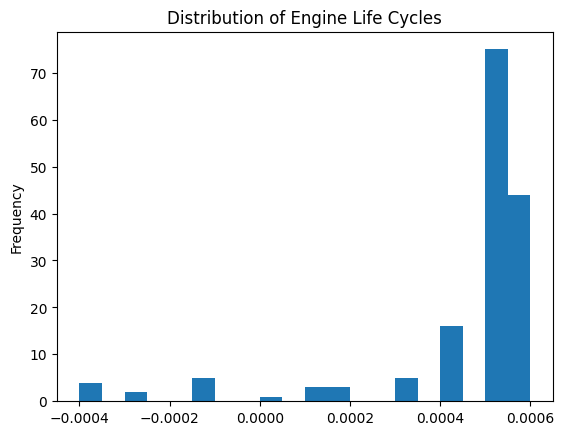

In [14]:
engine_cycles.plot(kind="hist", bins=20, title="Distribution of Engine Life Cycles")


# 5. Data Preprocessing

# 6. Feature Engineering

# 7. Model Building

# 8. Model Evaluation

# 9. Anomaly Detection

# 10. Explainability and Insights   

# 11. Gen AI Assistant

# 12. Limitation and Future Scope